In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 3

In [ ]:
input_file = "/lustre/scratch117/cellgen/team205/rl20/CTCL/object-new/T_ILC_NK_integration_downsample0.3_forMilo.h5ad"
adata = sc.read_h5ad(input_file)

In [3]:
mye_dict = {'0':'CD8_cytox',
            '1':'Treg', 
            '2':'Treg',
            '3':'CD4_TCM-like',
            '4':'CD8_TRM',
            '5':'Th',
            '6':'Th',
            '7':'CD8_cytox',
            '8':'CD4_eff',
            '9':'Th',
            '10':'ILC1/3',
            '11':'CD8_TRM',
            '12':'Th',
            '13':'ILC1/NK',
            '14':'CD8_cytox',
            '15':'Th',
            '16':'CD8_TCM-like',
            '17':'Th',
            '18':'Doublets',
            '19':'CD8_TRM',
            '20':'Th',
            '21':'Plasma_B_cells',
            '22':'Th',
            '23':'NK/CD8',
            '24':'Doublets',
            '25':'Proliferating',
            '26':'Th',
            '27':'Th',
            '28':'B_cells',
            '29':'CD8_cytox',
            '30':'CD8_TRM',
            '31':'Th22'
           }
adata.obs['anno_J'] = adata.obs['leiden_2.0'].map(mye_dict)

... storing 'anno_J' as categorical


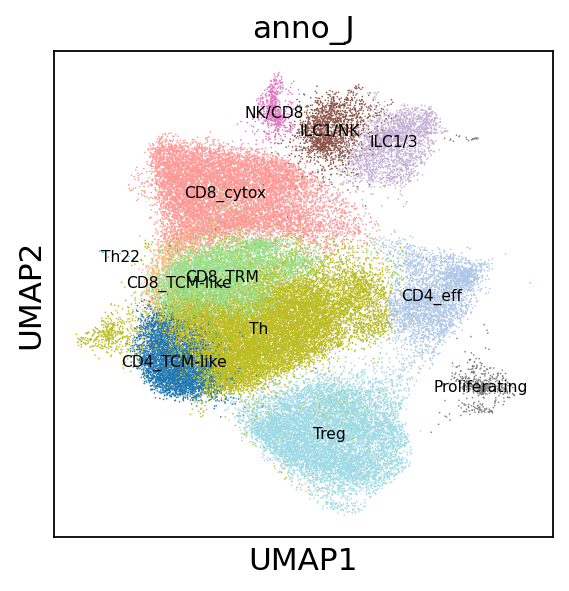

In [4]:
sc.settings.set_figure_params(dpi=80)
sc.pl.umap(adata, color=['anno_J'], palette='tab20', legend_loc='on data',legend_fontsize=7, legend_fontweight='medium')
#sc.pl.umap(adata_filtered_bbknn, color=['cell_type_broad'], palette='tab20'

In [6]:
adata = adata.raw.to_adata()

In [8]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)

computing neighbors
    using 'X_pca' with n_pcs = 30


/home/jovyan/my-conda-envs/myenv_old/lib/python3.7/site-packages/numba/core/typed_passes.py:327: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../my-conda-envs/myenv_old/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/home/jovyan/my-conda-envs/myenv_old/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../my-c

    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:16)


In [9]:
adata.obs['Condition'] = "a_Other"
ctcl = adata.obs['integrated_sample_id'] == 'CTCL'
adata.obs.loc[ctcl, 'Condition'] = 'CTCL'

In [10]:
adata.obs['Condition'].unique

<bound method Series.unique of TGACGGCAGGAGTCTG-1-4820STDY7389006-Healthy    a_Other
CGATCGGGTGTTTGTG-1-4820STDY7389006-Healthy    a_Other
AATCGGTTCGAACTGT-1-SKN8090592-Psoriasis       a_Other
AGCTCCTAGGTAGCTG-1-31-CTCL                       CTCL
TGCCCTACACTGTGTA-1-SKN8104896-Healthy         a_Other
                                               ...   
AGTTGGTGTCTCCATC-1-32-CTCL                       CTCL
TTCTCCTAGAATCTCC-1-31-CTCL                       CTCL
GTACTTTGTGAAAGAG-1-SKN8090578-Psoriasis       a_Other
CCTTCCCGTTCCAACA-1-37-CTCL                       CTCL
CTCGGGACACACGCTG-1-SKN8090538-AD              a_Other
Name: Condition, Length: 57605, dtype: object>

In [11]:
import anndata2ri
import rpy2.rinterface_lib.callbacks
import logging

In [12]:
# Ignore R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

In [13]:
anndata2ri.activate()

In [14]:
print(rpy2.__version__)

3.4.2


In [15]:
%load_ext rpy2.ipython

In [16]:
%%R
library(miloR)
library(igraph)
library(SingleCellExperiment)
library(scater)
library(scran)
library(dplyr)
library(patchwork)

In [17]:
adata_no_knn = adata.copy()
adata_no_knn.obsp = None
adata_no_knn.uns.pop("neighbors")

OverloadedDict, wrapping:
	{'connectivities_key': 'connectivities', 'distances_key': 'distances', 'params': {'n_neighbors': 10, 'method': 'umap', 'random_state': 0, 'metric': 'euclidean', 'n_pcs': 30}, 'rp_forest': {'hyperplanes': {'start': array([     0,  20427,  40946,  61385,  81898, 102165, 122660, 143079,
       163574, 183963, 204412, 224853, 245200, 265717, 286300, 306945,
       327532]), 'data': array([[ 0.05038071,  0.28088352, -2.3329651 , ..., -1.1450508 ,
        -0.06905869, -1.9305391 ],
       [-2.0616786 ,  0.2906758 ,  3.4961517 , ..., -0.07783374,
        -0.30733255,  1.3205681 ],
       [13.458562  , -4.888261  ,  2.2119627 , ..., -0.19741336,
         0.2692275 , -2.0326931 ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.    

In [18]:
%%R -i adata_no_knn
adata_no_knn

class: SingleCellExperiment 
dim: 23773 57605 
metadata(8): anno_J_colors donor_id_colors ... pca umap
assays(1): X
rownames(23773): AL627309.1 AL627309.3 ... AC233755.1 AC240274.1
rowData names(579): gene_ids.SKN8090524.AD feature_types.SKN8090524.AD
  ... feature_types.4820STDY7389014.Psoriasis n_cells
colnames(57605): TGACGGCAGGAGTCTG-1-4820STDY7389006-Healthy
  CGATCGGGTGTTTGTG-1-4820STDY7389006-Healthy ...
  CCTTCCCGTTCCAACA-1-37-CTCL CTCGGGACACACGCTG-1-SKN8090538-AD
colData names(31): sample_id mad_prd ... anno_J Condition
reducedDimNames(3): PCA X_pca_back UMAP
altExpNames(0):


In [19]:
%%R
milo <- Milo(adata_no_knn)
milo

class: Milo 
dim: 23773 57605 
metadata(8): anno_J_colors donor_id_colors ... pca umap
assays(1): X
rownames(23773): AL627309.1 AL627309.3 ... AC233755.1 AC240274.1
rowData names(579): gene_ids.SKN8090524.AD feature_types.SKN8090524.AD
  ... feature_types.4820STDY7389014.Psoriasis n_cells
colnames(57605): TGACGGCAGGAGTCTG-1-4820STDY7389006-Healthy
  CGATCGGGTGTTTGTG-1-4820STDY7389006-Healthy ...
  CCTTCCCGTTCCAACA-1-37-CTCL CTCGGGACACACGCTG-1-SKN8090538-AD
colData names(31): sample_id mad_prd ... anno_J Condition
reducedDimNames(3): PCA X_pca_back UMAP
altExpNames(0):
nhoods dimensions(2): 1 1
nhoodCounts dimensions(2): 1 1
nhoodDistances dimension(1): 0
graph names(0):
nhoodIndex names(1): 0
nhoodExpression dimension(2): 1 1
nhoodReducedDim names(0):
nhoodGraph names(0):
nhoodAdjacency dimension(2): 1 1


In [20]:
%%R 
milo <- buildGraph(milo, k=20, d=30)

In [21]:
adata_no_knn.obs.donor_id

TGACGGCAGGAGTCTG-1-4820STDY7389006-Healthy       S2
CGATCGGGTGTTTGTG-1-4820STDY7389006-Healthy       S2
AATCGGTTCGAACTGT-1-SKN8090592-Psoriasis          P2
AGCTCCTAGGTAGCTG-1-31-CTCL                    CTCL7
TGCCCTACACTGTGTA-1-SKN8104896-Healthy            S4
                                              ...  
AGTTGGTGTCTCCATC-1-32-CTCL                    CTCL7
TTCTCCTAGAATCTCC-1-31-CTCL                    CTCL7
GTACTTTGTGAAAGAG-1-SKN8090578-Psoriasis          P1
CCTTCCCGTTCCAACA-1-37-CTCL                    CTCL8
CTCGGGACACACGCTG-1-SKN8090538-AD                 E3
Name: donor_id, Length: 57605, dtype: category
Categories (20, object): ['CTCL1', 'CTCL2', 'CTCL3', 'CTCL4', ..., 'S2', 'S3', 'S4', 'S5']

In [22]:
design_df = adata_no_knn.obs[["donor_id", "Condition"]]
design_df.drop_duplicates(inplace=True)
design_df.index = design_df['donor_id']
design_df

/home/jovyan/my-conda-envs/myenv_old/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,donor_id,Condition
donor_id,,
S2,S2,a_Other
P2,P2,a_Other
CTCL7,CTCL7,CTCL
S4,S4,a_Other
CTCL4,CTCL4,CTCL
S3,S3,a_Other
E4,E4,a_Other
CTCL8,CTCL8,CTCL
E3,E3,a_Other


In [23]:
%%R -i design_df -o DA_results
## Define neighbourhoods
milo <- makeNhoods(milo, prop = 0.05, k = 200, d=30, refined = TRUE)

## Count cells in neighbourhoods
milo <- countCells(milo, meta.data = data.frame(colData(milo)), sample="donor_id")

## Calculate distances between cells in neighbourhoods
## for spatial FDR correction
milo <- calcNhoodDistance(milo, d=30)

## Test for differential abundance
#DA_results <-  testNhoods(milo, design = ~ 0 + Status, model.contrasts=c("integrated_sample_idCTCL-integrated_sample_idHealthy"),
#                         design.df = design_df)
DA_results <-  testNhoods(milo, design = ~ Condition,
                         design.df = design_df)

In [24]:
DA_results

,logFC,logCPM,F,PValue,FDR,Nhood,SpatialFDR
1,0.921578,9.234705,1.965654,0.160922,0.422532,1.0,0.439986
2,0.111610,10.359648,0.041224,0.839107,0.922333,2.0,0.923326
3,0.711221,9.768937,1.381789,0.239807,0.516728,3.0,0.533095
4,0.478090,9.932125,0.683797,0.408294,0.669546,4.0,0.681527
5,-0.035871,9.740330,0.003876,0.950359,0.982924,5.0,0.982974
...,...,...,...,...,...,...,...
1444,2.628804,9.569588,14.983158,0.000109,0.010497,1444.0,0.011401
1445,0.780910,9.438706,1.489213,0.222350,0.496090,1445.0,0.513494
1446,0.666408,9.345966,1.052042,0.305047,0.577396,1446.0,0.590779
1447,-1.443895,10.017547,5.527879,0.018729,0.138755,1447.0,0.150113


Text(0, 0.5, '- log10(Spatial FDR)')

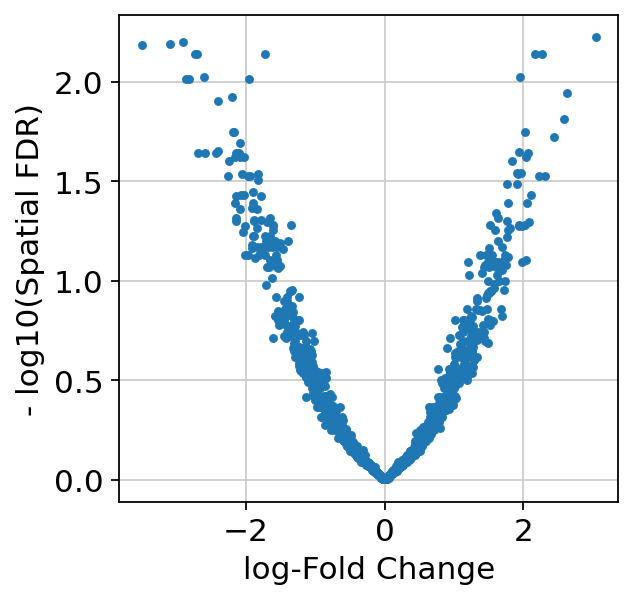

In [25]:
plt.plot(DA_results.logFC, -np.log10(DA_results.SpatialFDR), '.');
plt.xlabel("log-Fold Change");
plt.ylabel("- log10(Spatial FDR)")

In [26]:
%%R
milo <- buildNhoodGraph(milo)

In [31]:
%%R -w 1000 -h 800
plotNhoodGraphDA(milo, DA_results, alpha=1)
ggsave("./figures/milo_BenignT_neighborhood.pdf")

In [28]:
DA_results

,logFC,logCPM,F,PValue,FDR,Nhood,SpatialFDR
1,0.921578,9.234705,1.965654,0.160922,0.422532,1.0,0.439986
2,0.111610,10.359648,0.041224,0.839107,0.922333,2.0,0.923326
3,0.711221,9.768937,1.381789,0.239807,0.516728,3.0,0.533095
4,0.478090,9.932125,0.683797,0.408294,0.669546,4.0,0.681527
5,-0.035871,9.740330,0.003876,0.950359,0.982924,5.0,0.982974
...,...,...,...,...,...,...,...
1444,2.628804,9.569588,14.983158,0.000109,0.010497,1444.0,0.011401
1445,0.780910,9.438706,1.489213,0.222350,0.496090,1445.0,0.513494
1446,0.666408,9.345966,1.052042,0.305047,0.577396,1446.0,0.590779
1447,-1.443895,10.017547,5.527879,0.018729,0.138755,1447.0,0.150113


In [29]:
%%R
DA_results <- annotateNhoods(milo, DA_results, coldata_col = "anno_J") #### combine with pre-defined cell clusters
DA_results$cell_states <- ifelse(DA_results$anno_J_fraction < 0.7, "Mixed", DA_results$anno_J)
head(DA_results)

       logFC    logCPM           F      PValue        FDR Nhood SpatialFDR
1  0.9215782  9.234705 1.965653803 0.160921852 0.42253248     1 0.43998613
2  0.1116096 10.359648 0.041224410 0.839106954 0.92233313     2 0.92332633
3  0.7112214  9.768937 1.381789103 0.239807370 0.51672779     3 0.53309500
4  0.4780896  9.932125 0.683797350 0.408293543 0.66954592     4 0.68152676
5 -0.0358713  9.740330 0.003875884 0.950358972 0.98292391     5 0.98297367
6 -1.4629831 10.643030 7.855209397 0.005071189 0.06385288     6 0.06950761
     anno_J anno_J_fraction cell_states
1 CD8_cytox       1.0000000   CD8_cytox
2        Th       0.7410714          Th
3 CD8_cytox       0.9859155   CD8_cytox
4   CD4_eff       0.7529412     CD4_eff
5        Th       0.7358491          Th
6   CD8_TRM       0.5398773       Mixed


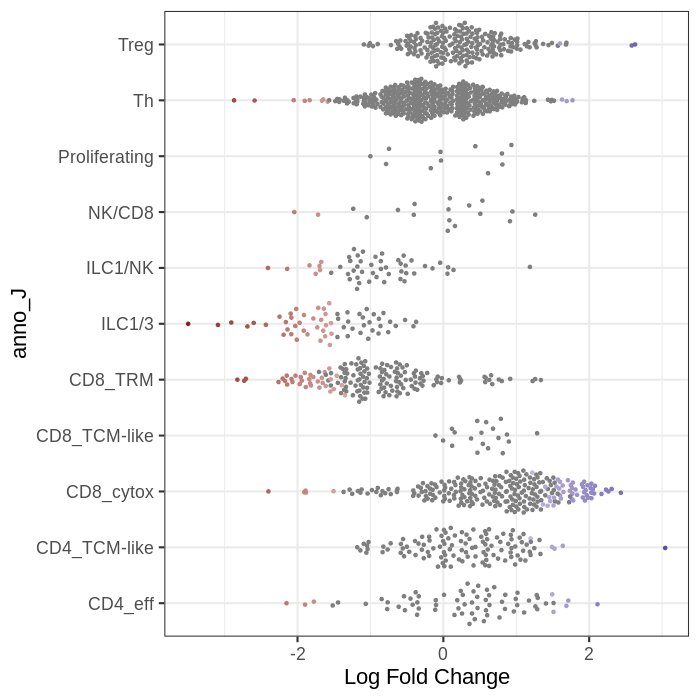

In [30]:
%%R -w 700 -h 700
plotDAbeeswarm(DA_results, group.by = "anno_J") ### "cell_states" represents pre-defined/pre-annotated cell clusters
               

In [32]:
%%R -w 700 -h 800 
library(ggplot2)
plotDAbeeswarm(DA_results, group.by = "anno_J") + 
    theme(legend.position = "none") +
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
    geom_hline(yintercept=0, linetype=2, color="black")
ggsave("./figures/milo_benign_T.pdf")